In [1]:
import numpy as np
from ceo.mapping import Mapping
import matplotlib.pyplot as plt
import os
%matplotlib inline

/home/ubuntu/CEO/python/ceo/zemax


# DM1 adjustments

## Load original .ceo file
Load original file created by G. Gonzalez (UAH):
- ALPAO_BAX449.ceo

In [2]:
#-- remove current link to whatever file it points.
os.remove('/home/ubuntu/CEO/gmtMirrors/ALPAO_BAX449.ceo') 

#-- Create link to the original file we got from Gillermo Gonzalez (UAH)
os.symlink('/home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/alpao_dm_ifs/ALPAO_BAX449.ceo', '/home/ubuntu/CEO/gmtMirrors/ALPAO_BAX449.ceo')

In [2]:
maps = Mapping()
maps.load("ALPAO_BAX449")
maps.suit

OrderedDict([('Ni', 116),
             ('L', 0.0265),
             ('N_SET', 1),
             ('N_MODE', 292),
             ('s2b', array([0, 0, 0, 0, 0, 0, 0], dtype=int32)),
             ('M', array([ 0.,  0.,  0., ...,  0., -0., -0.]))])

In [3]:
nmodes = maps.suit['N_MODE']
ni = int(maps.suit['Ni'])
modes = maps.suit["M"].reshape(-1,ni,ni)
modes.shape

(292, 116, 116)

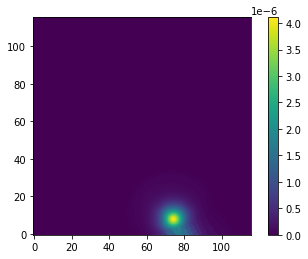

In [7]:
fig, ax = plt.subplots()
h = ax.imshow(modes[15,...], origin='lower')
fig.colorbar(h,ax=ax)

## Apply the required transformations
Rotate DM1 grid by 90 deg to match new 2024 actuator numbering scheme.

In [6]:
new_modes = np.zeros(modes.shape)
for jj in range(nmodes):
    new_modes[jj,...] = np.rot90(modes[jj,...], k=1)

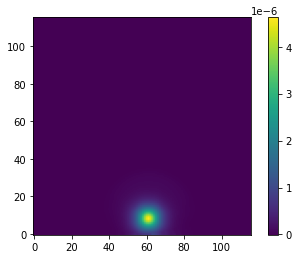

In [7]:
fig, ax = plt.subplots()
h = ax.imshow(new_modes[17,...], origin='lower')
fig.colorbar(h,ax=ax)

## Save new DM1 IF file

In [8]:
maps.suit['M'] = new_modes.flatten()
maps.dump("/home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/alpao_dm_ifs/ALPAO_BAX449_rot90")

In [9]:
#-- remove current link to whatever file it points.
os.remove('/home/ubuntu/CEO/gmtMirrors/ALPAO_BAX449.ceo')

#-- Create link to the new file
os.symlink('/home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/alpao_dm_ifs/ALPAO_BAX449_rot90.ceo', '/home/ubuntu/CEO/gmtMirrors/ALPAO_BAX449.ceo')

# DM2 adjustments

## Load original .ceo file
Load original file created by G. Gonzalez (UAH):
- ALPAO_BAX450.ceo

In [8]:
#-- remove current link to whatever file it points.
os.remove('/home/ubuntu/CEO/gmtMirrors/ALPAO_BAX450.ceo') 

#-- Create link to the original file we got from Gillermo Gonzalez (UAH)
os.symlink('/home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/alpao_dm_ifs/ALPAO_BAX450.ceo', '/home/ubuntu/CEO/gmtMirrors/ALPAO_BAX450.ceo')

In [9]:
maps = Mapping()
maps.load("ALPAO_BAX450")
maps.suit

OrderedDict([('Ni', 116),
             ('L', 0.0265),
             ('N_SET', 1),
             ('N_MODE', 292),
             ('s2b', array([0, 0, 0, 0, 0, 0, 0], dtype=int32)),
             ('M', array([-0., -0., -0., ..., -0., -0., -0.]))])

In [10]:
nmodes = maps.suit['N_MODE']
ni = int(maps.suit['Ni'])
modes = maps.suit["M"].reshape(-1,ni,ni)
modes.shape

(292, 116, 116)

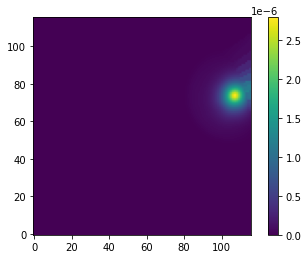

In [11]:
fig, ax = plt.subplots()
h = ax.imshow(modes[15,...], origin='lower')
fig.colorbar(h,ax=ax)

## Apply the required transformations
1. Rotate DM1 grid by 90 deg to match new 2024 actuator numbering scheme.

In [12]:
new_modes = np.zeros(modes.shape)
for jj in range(nmodes):
    new_modes[jj,...] = np.rot90(modes[jj,...], k=1)

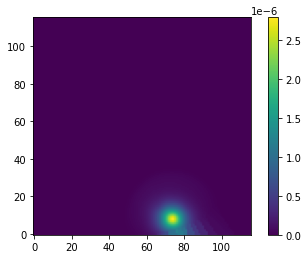

In [14]:
fig, ax = plt.subplots()
h = ax.imshow(new_modes[15,...], origin='lower')
fig.colorbar(h,ax=ax)

2. Apply a flip across the horizontal axis to match relative orientation of GMT pupil imaged on DM2

In [15]:
new_modes_2 = np.flip(new_modes, axis=1)

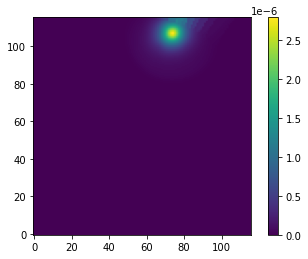

In [16]:
fig, ax = plt.subplots()
h = ax.imshow(new_modes_2[15,...], origin='lower')
fig.colorbar(h,ax=ax)

## Save new DM2 IF file

In [18]:
maps.suit['M'] = new_modes_2.flatten()
maps.dump("/home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/alpao_dm_ifs/ALPAO_BAX450_rot90_flipOverX")

In [17]:
#-- remove current link to whatever file it points.
os.remove('/home/ubuntu/CEO/gmtMirrors/ALPAO_BAX450.ceo')

#-- Create link to the new file
os.symlink('/home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/alpao_dm_ifs/ALPAO_BAX450_rot90_flipOverX.ceo', '/home/ubuntu/CEO/gmtMirrors/ALPAO_BAX450.ceo')